#### **Importing libraries**

In [219]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon, maxwell, gamma, t
from scipy.optimize import curve_fit

#### **Reading data from file**

In [220]:
data = np.loadtxt("data10.txt")
print("First five elements are:")
data[:5]

First five elements are:


array([[0.1       , 0.00835688, 0.0012362 ],
       [0.14974874, 0.01296866, 0.00150538],
       [0.19949749, 0.01866468, 0.00179013],
       [0.24924623, 0.02145788, 0.00208353],
       [0.29899497, 0.03217391, 0.00238114]])

###### **Parse data into 3 arrays**

In [221]:
x_array = (data.T)[0]
y_array = (data.T)[1]
err_array = (data.T)[2]
x_array[:5]

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497])

#### **Plot graph with this data**

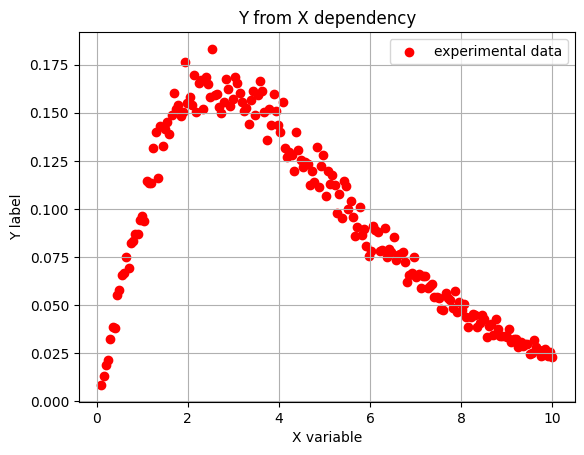

In [222]:
plt.xlabel("X variable")
plt.ylabel("Y label")
plt.title("Y from X dependency")
plt.grid()
plt.scatter(x_array, y_array, c="red", label="experimental data")
plt.legend()

#### **Define resulting functions**

In [223]:
import math

def exponential_distribution(x, l):
    return l*np.exp(-l*x)

def gamma_distribution(x, a, b):
    return np.power(x, a)*np.exp(-x/b)/(np.power(b, a+1)*math.gamma(a+1))

def maxwell_distribution(x, a):
    return np.sqrt(2/np.pi)*np.power(a, 3)*np.power(x, 2)*np.exp(-np.power(a, 2) * \
        np.power(x, 2)/2)

#### **Make universal plotting and fitting function**

#### **About curvefit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html**

In [224]:
def fit_and_plot(x, y, func):
    popt, pcov = curve_fit(func, x, y, method='lm',)
    plt.plot(x, func(x, *popt), 'r-', label="fit curve")
    plt.scatter(x, y, c="blue", label="experimantal data")
    plt.xlabel('X variable')
    plt.ylabel('Y label')
    plt.title("Distribution on experimental data")
    plt.grid()
    plt.legend()
    plt.show()
    return popt

#### **Apply exponential distribution to experimental data**

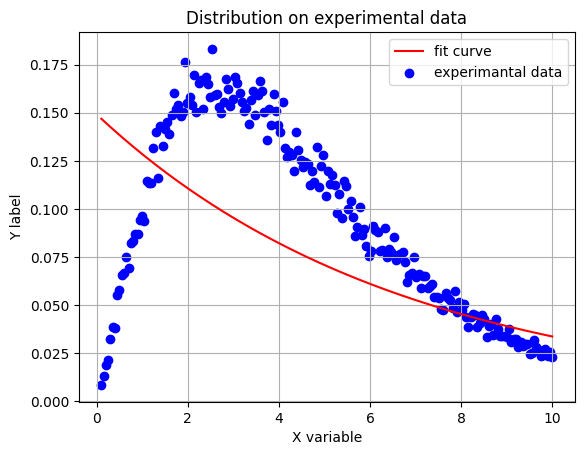

In [225]:
expon_params = fit_and_plot(x_array, y_array, exponential_distribution)

#### **Apply gamma distribution to experimental data**

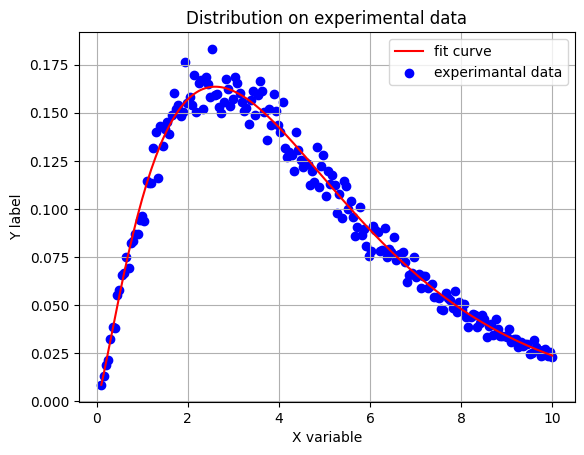

In [226]:
gamma_params = fit_and_plot(x_array, y_array, gamma_distribution)

#### **Apply maxwell distribution to experimental data**

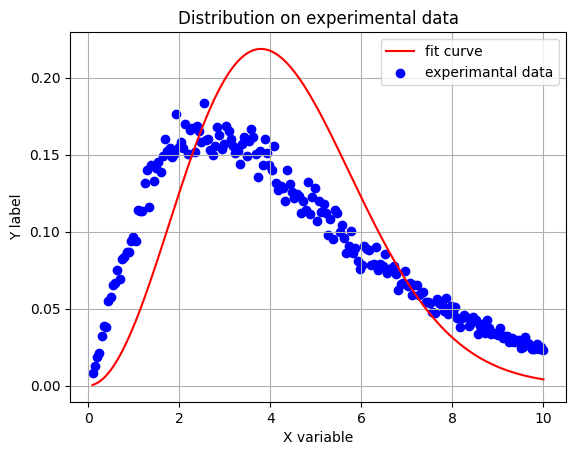

In [227]:
maxwell_params = fit_and_plot(x_array, y_array, maxwell_distribution)

#### **Define function that calculates weighted residuals**

In [228]:
def weighted_residuals(x, y, err, func, params):
    return (y - func(x, *params))/err

#### **Plot graphs of weighted residuals**

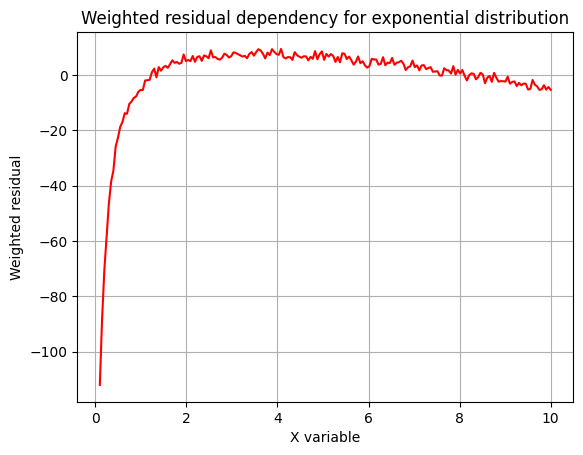

In [229]:
plt.xlabel("X variable")
plt.ylabel("Weighted residual")
plt.title("Weighted residual dependency for exponential distribution")
plt.grid()
plt.plot(x_array, weighted_residuals(x_array, y_array, err_array, \
    exponential_distribution, expon_params), c="red")

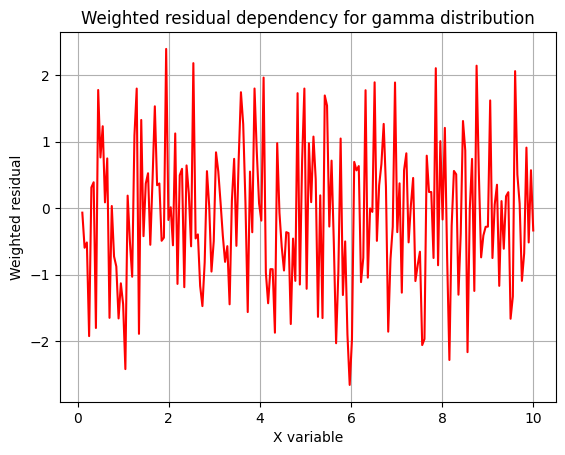

In [230]:
plt.xlabel("X variable")
plt.ylabel("Weighted residual")
plt.title("Weighted residual dependency for gamma distribution")
plt.grid()
plt.plot(x_array, weighted_residuals(x_array, y_array, err_array, \
    gamma_distribution, gamma_params), c="red")

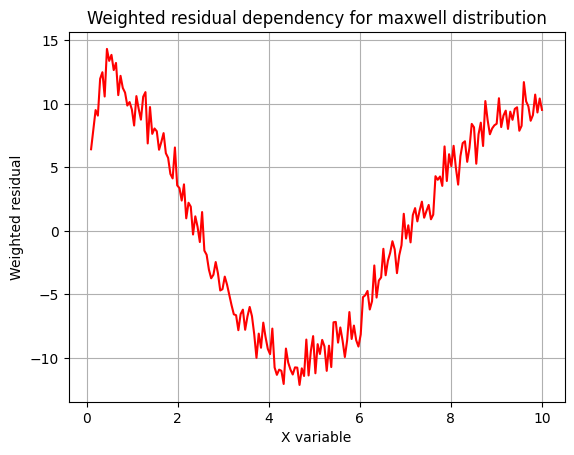

In [231]:
plt.xlabel("X variable")
plt.ylabel("Weighted residual")
plt.title("Weighted residual dependency for maxwell distribution")
plt.grid()
plt.plot(x_array, weighted_residuals(x_array, y_array, err_array, \
    maxwell_distribution, maxwell_params), c="red")

#### **Define function that calculates autocorelation**

In [232]:
def autocorelation(data):
    mean = np.mean(data)
    # Variance
    var = np.var(data)
    # Normalized data
    ndata = data - mean
    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    return acorr/var/len(ndata)

#### **Plot autocorrelation**

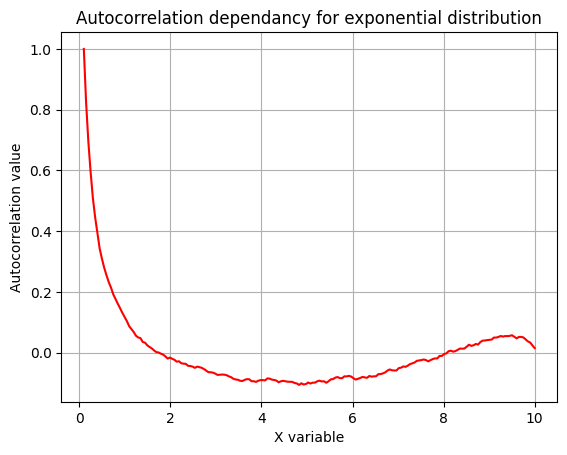

In [233]:
plt.xlabel("X variable")
plt.ylabel("Autocorrelation value")
plt.title("Autocorrelation dependancy for exponential distribution")
plt.grid()
expon_data = weighted_residuals(x_array, y_array, err_array, \
    exponential_distribution, expon_params)
plt.plot(x_array, autocorelation(expon_data), c="red")

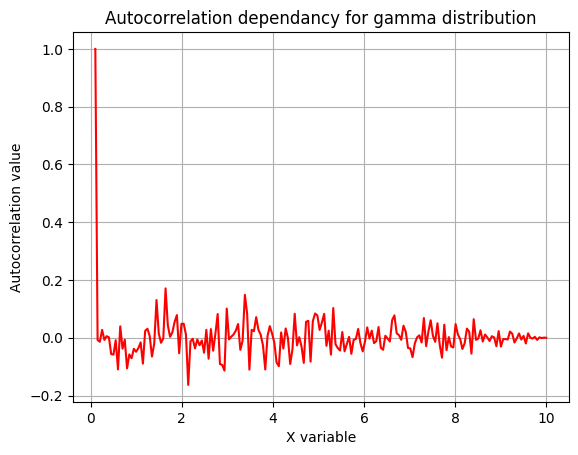

In [234]:
plt.xlabel("X variable")
plt.ylabel("Autocorrelation value")
plt.title("Autocorrelation dependancy for gamma distribution")
plt.grid()
gamma_data = weighted_residuals(x_array, y_array, err_array, \
    gamma_distribution, gamma_params)
plt.plot(x_array, autocorelation(gamma_data), c="red")

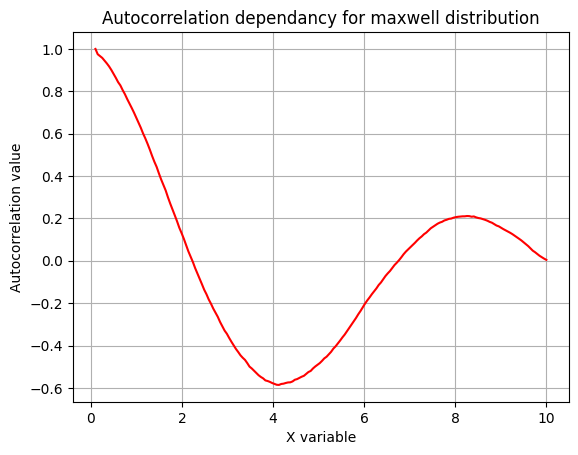

In [235]:
plt.xlabel("X variable")
plt.ylabel("Autocorrelation value")
plt.title("Autocorrelation dependancy for maxwell distribution")
plt.grid()
maxwell_data = weighted_residuals(x_array, y_array, err_array, \
    maxwell_distribution, maxwell_params)
plt.plot(x_array, autocorelation(maxwell_data), c="red")

#### **Print data for gamma distribution**

In [236]:
gamma_params

array([1.29054463, 2.01512493])

#### **Find the limits of 68% interval**

In [237]:
# conf_int_16 = t.interval(0.16, df=x_array.size-1)
# conf_int_82 = t.interval(0.82, df=x_array.size-1)
# conf_int_16, conf_int_82

In [238]:
# cov = np.diag(curve_fit(gamma_distribution, x_array, y_array)[1])
# cov

#### **Find interval for gamma distribution params**

In [239]:
import scipy.stats as st

def confidence_interval(popt, pcov, alpha):
    n = len(popt)
    p = np.zeros(n)
    se = np.zeros(n)

    for i in range(n):
        p[i] = popt[i]
        se[i] = np.sqrt(pcov[i,i])

    tval = st.t.ppf(1-alpha/2., n-1)  # Student-t value for the dof and confidence level

    return p - se * tval, p + se * tval

In [240]:
# gamma_params + conf_int_16*np.sqrt(cov), gamma_params - conf_int_16*np.sqrt(cov)

In [241]:
confidence_interval(*curve_fit(gamma_distribution, x_array, y_array), 0.68)

(array([1.28016069, 2.00336426]), array([1.30092857, 2.02688559]))

#### **Chi-squared**

In [255]:
popt = curve_fit(gamma_distribution, x_array, y_array)[0]
chisq = np.sum(((gamma_distribution(x_array, *popt) - y_array)/err_array)**2)/(y_array.shape[0] - len(popt) - 1) 
print("Chi-Square Data: ", chisq)

Chi-Square Data:  1.1896625325397328
